# Question 2:

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import scipy.integrate as integrate

In [60]:
lam = 1.0
x0  = 0.1

# Analytical solution:

Logistic differential equation:
$$
\dot{x} = \lambda \, x \, (1-x)
$$ 

The analytic solution is given by
$$
x_t = \dfrac{x_0 \exp(\lambda t)}{1-x_0+x_0 \exp(\lambda t)}
$$

In [61]:
x_analytical_sol = lambda t: x0 * np.exp(lam *t) / (1 - x0 + x0*np.exp(lam*t))

In [62]:
T = np.linspace(0,10,100)
x = x_analytical_sol(T)

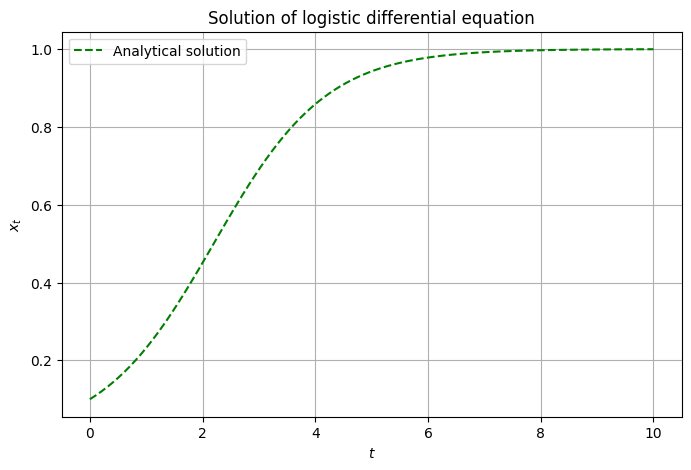

In [63]:
plt.figure(figsize=(8,5))
plt.plot(T, x, '--g', label = 'Analytical solution')
plt.xlabel('$t$')
plt.ylabel('$x_t$')
plt.title('Solution of logistic differential equation')
plt.grid()
plt.legend();

# Euler method:

Euler method for ODE
\begin{equation}
    \frac{dx}{dt} = f(x)
\end{equation}
is given by
\begin{equation}
    x(t + \Delta t) = x(t) + f(x) \Delta t
\end{equation}


In [64]:
fx = lambda x: lam * x * (1 - x)

In [65]:
def Euler_discretization_method(func, x0, T):
    x = np.zeros((len(T),1))
    x[0] = x0
    dt = T[1] - T[0]
    for n in range(1, len(T)):
        x[n] = x[n-1] + func(x[n-1]) * dt
    return x

In [66]:
x_euler = Euler_discretization_method(fx, x0, T)

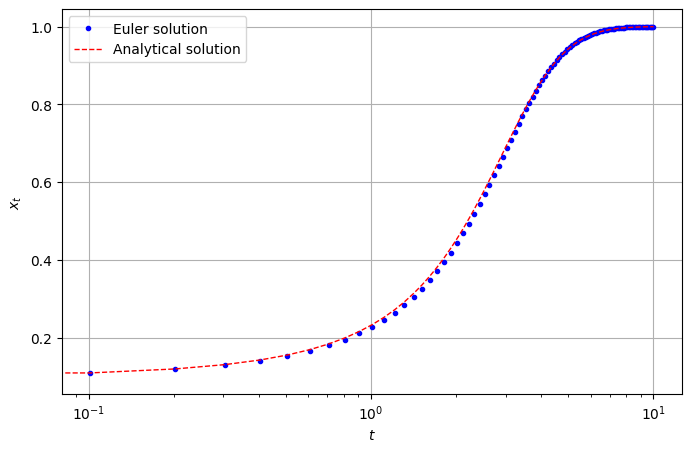

In [67]:
plt.figure(figsize=(8,5))
plt.semilogx(T, x_euler, '.b', label='Euler solution', linewidth=1.)
plt.semilogx(T, x, '--r', label = 'Analytical solution', linewidth=1.)
plt.xlabel('$t$')
plt.ylabel('$x_t$')
plt.grid()
plt.legend();


In [72]:
print(np.max(np.abs(x[:,None] - x_euler)))

0.01293430973317522


In [51]:
# Read about broadcasting in python e.g. from https://numpy.org/doc/stable/user/basics.broadcasting.html

# Runge–Kutta method of order 4 (RK4):
RK4 method for ODE
\begin{equation}
    \frac{dx}{dt} = f(x)
\end{equation}
is given by
$$
    k_1 = f(x) \Delta t \\
    k_2 = f(x + 0.5 k_1) \Delta t\\
    k_3 = f(x + 0.5 k_2) \Delta t\\
    k_4 = f(x + k_3) \Delta t\\
    x_{n+1} = x_n + \frac{1}{6}(k_1 + 2 \, k_2 + 2 \, k_3 + k_4)
$$


In [73]:
def RK4_discretization_method(func, x0, T):
    x = np.zeros((len(T), 1))
    x[0] = x0
    
    for n in range(1, len(T)):
        dt = T[n] - T[n-1]
        k1 = func(x[n-1]) * dt
        k2 = func(x[n-1] + 0.5*k1)* dt
        k3 = func(x[n-1] + 0.5*k2)* dt
        k4 = func(x[n-1] + k3)* dt
        x[n] = x[n-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4) 
    return x
    
    

In [74]:
x_rk4 = RK4_discretization_method(fx, x0, T)

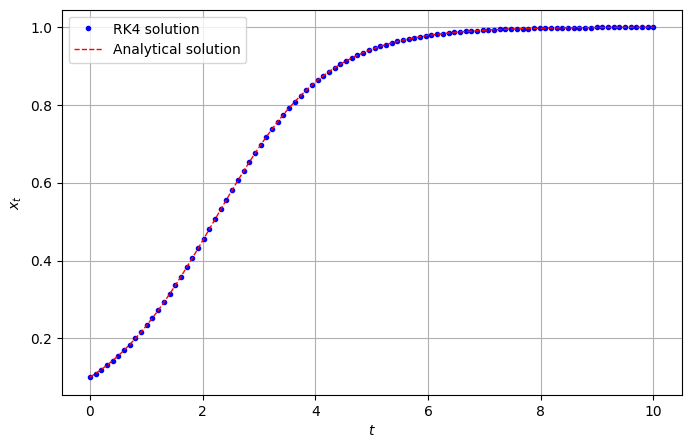

In [75]:
plt.figure(figsize=(8,5))
plt.plot(T, x_rk4, '.b',label='RK4 solution',linewidth=1.)
plt.plot(T, x, '--r', label = 'Analytical solution',linewidth=1.)
plt.xlabel('$t$')
plt.ylabel('$x_t$')
plt.grid()
plt.legend();

In [76]:
print(np.max(np.abs(x[:,None] - x_rk4)))

1.2426488016359372e-07


# Bultin ODE solver

In [77]:
mod_f = lambda x, t: fx(x)
x_odeint = scipy.integrate.odeint(mod_f, x0, T)

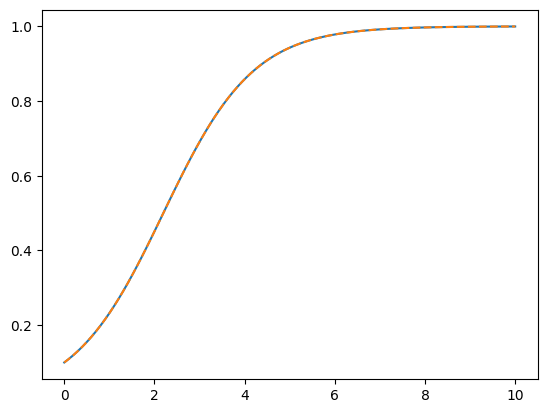

In [78]:
plt.plot(T, x_odeint, T, x, '--');

In [79]:
print(np.max(np.abs(x[:,None] - x_odeint)))

1.2397002790986988e-07


# Question 3

In [81]:
f_robot = lambda x,u: np.array( [u[0]*np.cos(x[2]), 
                                 u[0]*np.sin(x[2]), 
                                 u[1]] )
 

In [83]:
x_robot_0 = np.array([0.,0.,0.])
t_robot = np.linspace(0.,5.,501)
dt_robot = t_robot[1]-t_robot[0]

In [84]:
def u(tr):
    ur = np.zeros((t_robot.shape[0],2))
    for n, t in enumerate(tr):
        if 0 <= t < 1:
            u1 = t
            u2 = 0
        if 1 <= t < 2:
            u1 = 1
            u2 = 0
        if 2 <= t < 3:
            u1 = 1
            u2 = math.pi/2
        if 3 <= t < 4:
            u1 = 1
            u2 = 0
        if 4 <= t < 5:
            u1 = 5 - t
            u2 = 0
        ur[n, 0] = u1
        ur[n, 1] = u2
    return ur

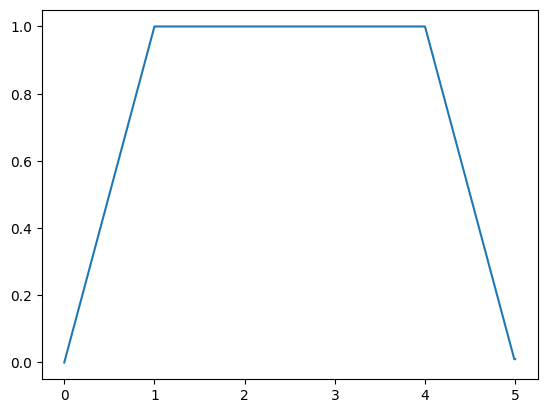

In [85]:
# speed
plt.plot(t_robot, u(t_robot)[:,0]);

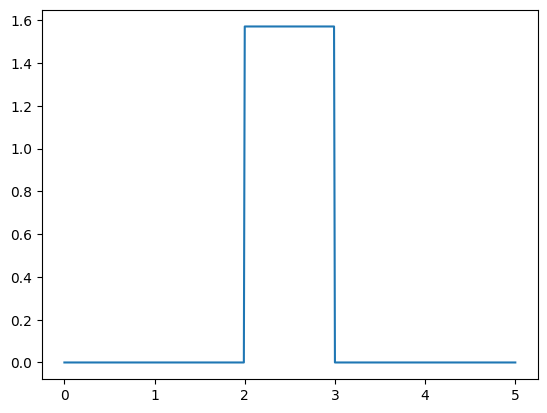

In [86]:
# angular velocity: rotation per second
plt.plot(t_robot, u(t_robot)[:,1]);

In [87]:
def Euler_method(func, u, x0, T):
    x = np.zeros((len(T),3))
    x[0] = x0
    for n in range(1, len(T)):
        dt = T[n] - T[n-1]
        x[n,:] = x[n-1,:] + func(x[n-1,:], u[n-1,:]) * dt
    return x

In [88]:
u_robot = u(t_robot)
x_robot_euler = Euler_method(f_robot, u_robot, x_robot_0, t_robot)


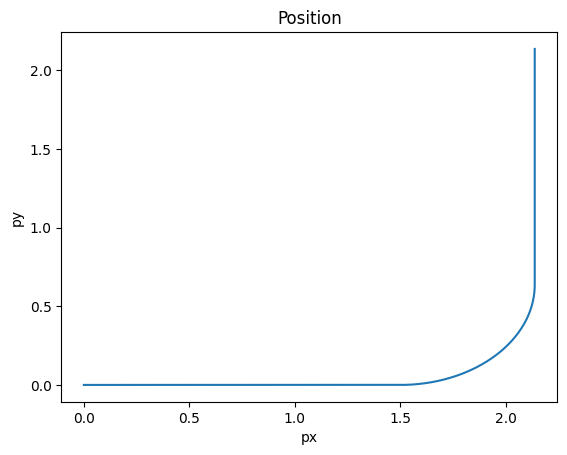

In [89]:
plt.plot(x_robot_euler[:,0], x_robot_euler[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position');

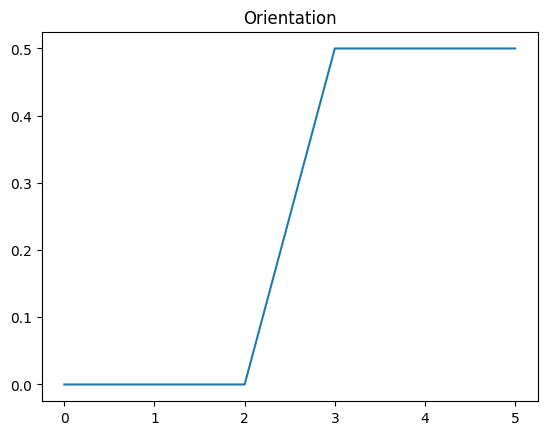

In [90]:
plt.plot(t_robot,x_robot_euler[:,2]/np.pi)
plt.title('Orientation');

# Robot dynamics with noise

In [96]:
def Euler_Maryama_method(func, u, x0, T, w):
    x = np.zeros((len(T),3))
    x[0] = x0
    for n in range(1, len(T)):
        dt = T[n] - T[n-1]
        x[n,:] = x[n-1,:] + func(x[n-1,:], u[n-1,:]) * dt + np.sqrt(dt) * w[n-1]
    return x

In [97]:
stdev = 0.1
w_robot = stdev*np.random.randn(t_robot.shape[0],x_robot_0.shape[0])

In [98]:
x_robot_euler_maryama = Euler_Maryama_method(f_robot, u_robot, x_robot_0, t_robot,w_robot)



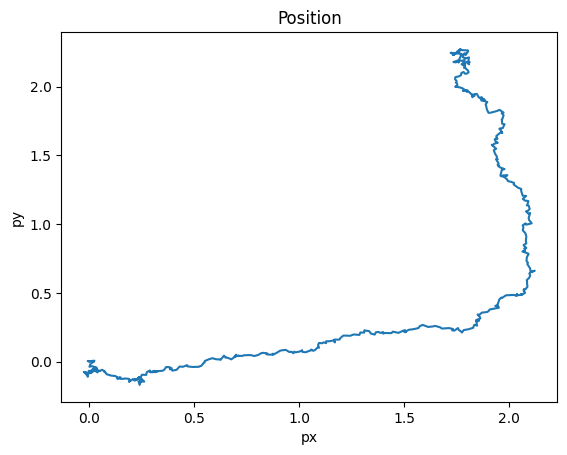

In [99]:
plt.plot(x_robot_euler_maryama[:,0], x_robot_euler_maryama[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position');

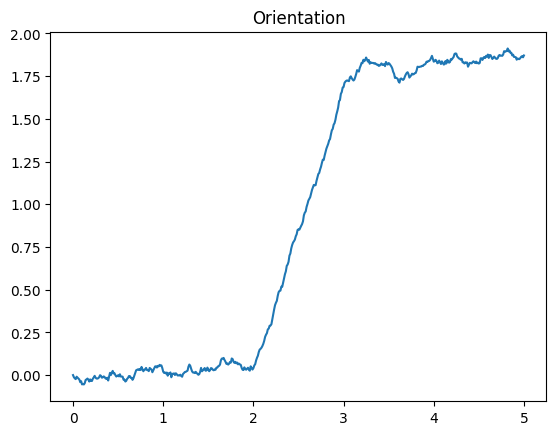

In [100]:
plt.plot(t_robot,x_robot_euler_maryama[:,2])
plt.title('Orientation');